# Hackathon-Time series

Using the monthly average sunspot data available from 1749 to 2010, build a model to forecast the monthly average sunspot count for the period of 2011-2020 

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,Month,Avg_sunspot_count
0,01-01-1749,97
1,02-01-1749,104
2,03-01-1749,117
3,04-01-1749,93
4,05-01-1749,142


In [4]:
train_df.tail()

,Month,Avg_sunspot_count
3139,08-01-2010,30
3140,09-01-2010,36
3141,10-01-2010,34
3142,11-01-2010,34
3143,12-01-2010,25


In [5]:
train_df.shape

(3144, 2)

In [6]:
test_df.head()

,Month
0,01-01-2011
1,02-01-2011
2,03-01-2011
3,04-01-2011
4,05-01-2011


In [7]:
test_df.shape

(120, 1)

In [8]:
date = pd.date_range(start = '1/1/1749', end='12/31/2010',freq='M')
date

DatetimeIndex(['1749-01-31', '1749-02-28', '1749-03-31', '1749-04-30',
               '1749-05-31', '1749-06-30', '1749-07-31', '1749-08-31',
               '1749-09-30', '1749-10-31',
               ...
               '2010-03-31', '2010-04-30', '2010-05-31', '2010-06-30',
               '2010-07-31', '2010-08-31', '2010-09-30', '2010-10-31',
               '2010-11-30', '2010-12-31'],
              dtype='datetime64[ns]', length=3144, freq='M')

In [9]:
train_df['Date']=pd.to_datetime(date)
train_df.set_index('Date',inplace=True)
train_df=train_df.drop('Month',axis=1)

In [10]:
train_df.head()

,Avg_sunspot_count
Date,
1749-01-31,97
1749-02-28,104
1749-03-31,117
1749-04-30,93
1749-05-31,142


In [11]:
train_df.tail()

,Avg_sunspot_count
Date,
2010-08-31,30
2010-09-30,36
2010-10-31,34
2010-11-30,34
2010-12-31,25


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 15,8

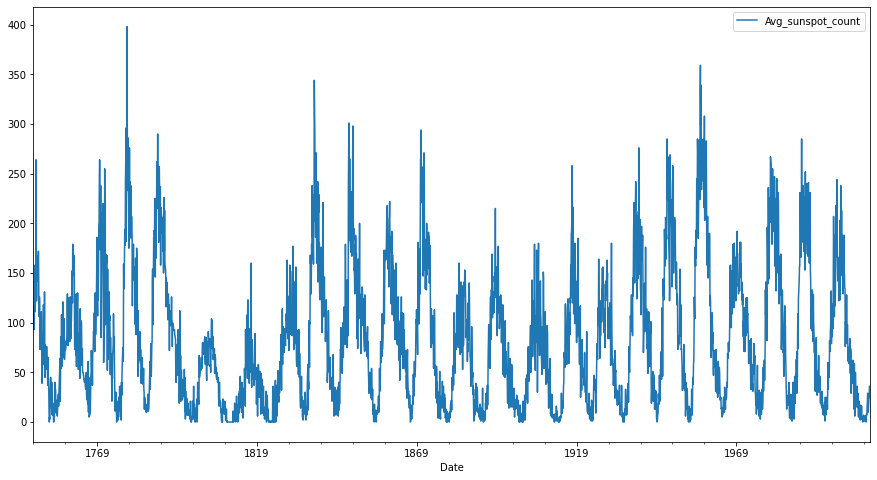

In [13]:
train_df.plot();

In [14]:
train_df.isnull().sum() #checking for missing values

Avg_sunspot_count    0
dtype: int64

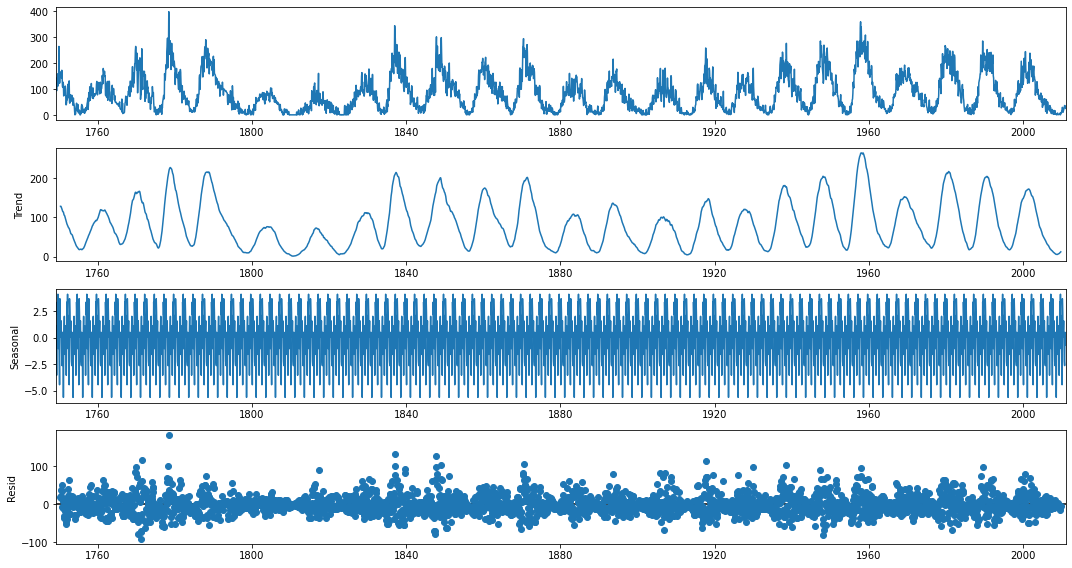

In [15]:
from statsmodels.tsa.seasonal import  seasonal_decompose
decomposition = seasonal_decompose(train_df, model = 'additive',period=30)
decomposition.plot()
plt.show()

In [16]:
#has no seasonality
#but shows presence of trend
#series is additive in nature

# stationarity test


In [17]:
from statsmodels.tsa.stattools import  adfuller
observations= train_df.values
test_result = adfuller(observations)

In [18]:
test_result

(-10.390308589912841,
 2.0290768019122118e-18,
 28,
 3115,
 {'1%': -3.43245102630828,
  '5%': -2.862468302843017,
  '10%': -2.5672641578701927},
 28786.33743096589)

In [19]:
#pvalue<0.05 thus reject H0 ,series is  a stationary 

In [20]:
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf

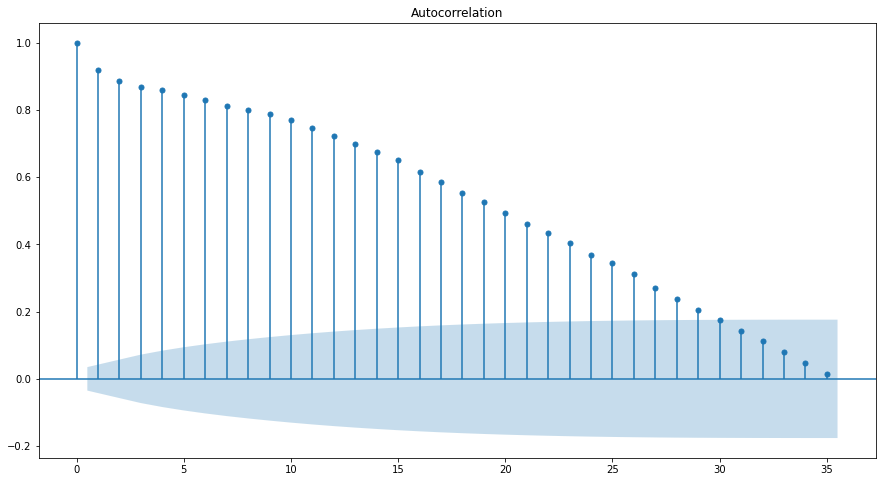

In [21]:
plot_acf(train_df);#q=28-lags

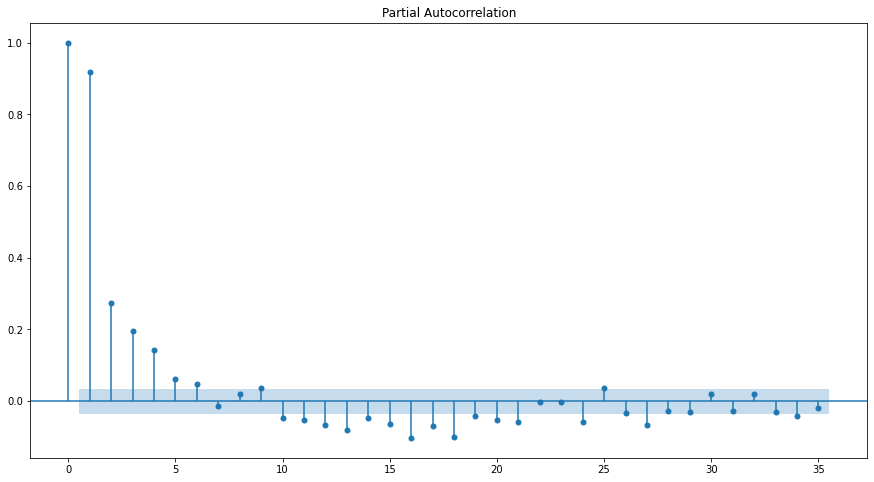

In [22]:
plot_pacf(train_df); 

In [23]:
#(p,q)=(4,28)

In [24]:
from warnings import filterwarnings
filterwarnings('ignore')

### Train-Test split

In [25]:
from datetime import datetime, timedelta
train_end = datetime(2005,8,31)
test_end = datetime(2010,12,31)

In [26]:
train = train_df[:train_end]
test = train_df[train_end+timedelta(days=1):test_end]

# ARMA Model

In [60]:
from statsmodels.tsa.arima_model import  ARMA
model=ARMA(train,order=(1,5))
model_fit=model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:      Avg_sunspot_count   No. Observations:                 3080
Model:                     ARMA(1, 5)   Log Likelihood              -14351.071
Method:                       css-mle   S.D. of innovations             25.537
Date:                Tue, 18 May 2021   AIC                          28718.143
Time:                        21:03:24   BIC                          28766.404
Sample:                    01-31-1749   HQIC                         28735.479
                         - 08-31-2005                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      84.3029     11.778      7.158      0.000      61.219     107.387
ar.L1.Avg_sunspot_count     0.9807      0.004    256.826      0.000       0.973       0.988


In [61]:
forecast=pd.DataFrame(model_fit.forecast(120)[0])
forecast.head()

,0
0,59.802167
1,60.205374
2,60.922052
3,61.632440
4,62.126761


In [62]:
forecast.tail()

,0
115,81.739412
116,81.788760
117,81.837159
118,81.884626
119,81.931179


In [63]:
#concatinating test and the forecast values

In [64]:
df=pd.concat([test_df,forecast],axis=1)

In [65]:
df.head()

,Month,0
0,01-01-2011,59.802167
1,02-01-2011,60.205374
2,03-01-2011,60.922052
3,04-01-2011,61.632440
4,05-01-2011,62.126761


In [66]:
date=df['Month']
solution= pd.DataFrame({'Month':date,
                         'Avg_sunspot_count':df[0]})

In [67]:
solution.head(10)

,Month,Avg_sunspot_count
0,01-01-2011,59.802167
1,02-01-2011,60.205374
2,03-01-2011,60.922052
3,04-01-2011,61.632440
4,05-01-2011,62.126761
5,06-01-2011,62.553665
6,07-01-2011,62.972351
7,08-01-2011,63.382977
8,09-01-2011,63.785698
9,10-01-2011,64.180666


In [68]:
solution.shape

(120, 2)

In [69]:
solution.to_csv('solution.csv', index=False)